# Quantum teleportation

        MD.Nazmuddoha Ansary  
        Quamtum Computing with IBM Q Experience   
        

**Quantum teleportation** is a process in which quantum information *(e.g. the exact state of an atom or photon)* can be transmitted (exactly, in principle) from one location to another, with the help of classical communication and previously shared quantum entanglement between the sending and receiving location. Because it depends on classical communication, which can proceed no faster than the speed of light, it cannot be used for faster-than-light transport or communication of classical bits. [source](https://en.wikipedia.org/wiki/Quantum_teleportation)

**PLEASE NOTE THAT:**
* This **Does NOT** mean we can trasnport a **qbit physically from one place to another**
* This is a tranformation of **quantum information** from one place to another

### BUT WHATS SO IMPORTATNT ABOUT THIS?
Well, in a classical computer we copy stuff from one place to another with absolutely no issue. But in a **Quantum Computer** you are actually not allowed to copy because the moment you try to copy you perfom an actual **measurement** which destroys the original states.So to copy the states we need to take advantage of **entanglement**. [Quantum Entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement) 

**THE CODE IS STRICTLY BASED ON OFFICIAL QISKIT TUTORIALS.**
[QISKIT-COMMUNITY-TUTORIALS](https://github.com/Qiskit/qiskit-community-tutorials)

In [1]:
# import qiskit and check versions
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [2]:
# Build a quntum circuit for teleportaion
from qiskit import *
%matplotlib inline
num_of_classical_bits=3
num_of_quantum_bits=3
circuit=QuantumCircuit(num_of_quantum_bits,num_of_classical_bits)
print('Text Based Circuit')
circuit.draw()

Text Based Circuit


Another way to create a quantum circuit is to get **registers**
* ```qr=QuantumRegister(NUM_OF_REGISTERS)```
* ```cr=ClassicalRegister(NUM_OF_REGISTERS)```  

and pass the in the **QuantumCircuit(qr,cr)** 

### Teleportation Circuit
* We will take the state at **q_0** and teleport it to **q_2**
* **q_1** is a resource we will use to do this process
* For simplicity we will teleport the state **1** from q0 to q2
* To get state 0 to state 1 we will apply **x-gate** to q0

**Pauli X-Gate**: 
The Pauli-X gate acts on a single qubit. It is the quantum equivalent of the NOT gate for classical computers.

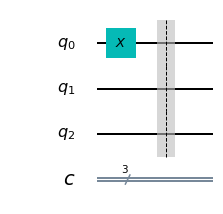

In [3]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

Now after applying **xgate** to qo , after the barrier the state will be 1.

### Teleportation protocol
* Apply a **Hadamard gate** on **q1**
* Apply a **Controlled X gate** between **q1** and **q2**
* Apply a **Controlled X gate** between **q0** and **q1**
* Apply a **Hadamard gate** on **q1**
* Take measurements from **q0** and **q1** and set them to classical registers
* Apply a **Controlled X gate** between **q1** and **q2**
* Apply a **Controlled Z gate** between **q0** and **q2**
 


Please find the gate introductions in [Quantum Logic Gate](https://en.wikipedia.org/wiki/Quantum_logic_gate)


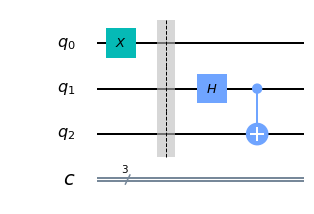

In [4]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

In [5]:
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1]) # measurements to classical registers
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')
circuit.measure(2,2)       # measurements to classical registers


Now the **state 1** after the **xgate** for **q0** will be now be transported to **q2**
To verify this-
* Add a measurement to q2 to classical reg: 2 
* Simulate for N number of shots

Counts:{'101': 283, '111': 274, '100': 241, '110': 226}


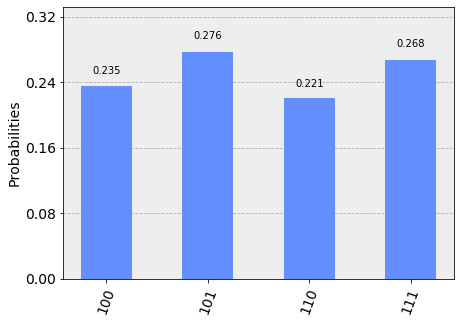

In [6]:
from qiskit.tools.visualization import plot_histogram

 

# now simulate to see the results
simulator=Aer.get_backend('qasm_simulator')

result=execute(circuit,backend=simulator,shots=1024).result()

counts=result.get_counts()

print('Counts:{}'.format(counts))
plot_histogram(counts)

### Understanding the results
* The count results are read as **c2c1c0** 
* We are only interested in **c2** as that is what is measuring **q2**
* So we are only getting results when **c2=1** *(i.e-001,010,000,011 return no results)* 

### So what should be done to pass another quantum state??
say you want to pass the state **(0-1)/sqroot(2)** 
* Apply **x gate** : |0> ==> |1>
* Apply **Hadamard**: |1> ==> (|0> - |1>)/ sqroot(2)
* Now pass it through the transmission protocol

## Running On Real IBM - Q Hardware
* Get Access Token From IBM Q experience
* Load Account
* Get Backend
* Execute Like Normal circuit

In [7]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

In [8]:
import qiskit.tools.jupyter
%qiskit_job_watcher
# get comp
qcomp = provider.get_backend('ibmq_16_melbourne')
# execute
job = execute(circuit, backend=qcomp)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [9]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


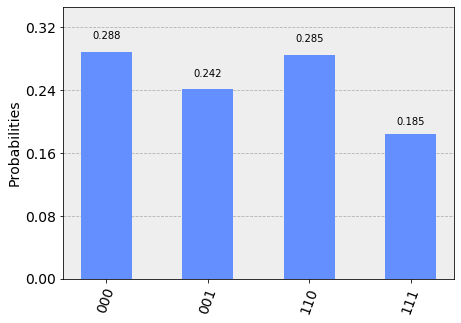

In [10]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [11]:
%qiskit_disable_job_watcher

In [12]:
%qiskit_copyright